In [1]:
# Certify the installation
# !pip show pandas numpy scikit-learn joblib

In [2]:
# if not installed, install pyCaret (Optional)
# !pip install pyCaret --use-pep517

In [3]:
# Certify the pyCaret installation
# !pip show pyCaret

### Test

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5080,0.7407,0.5080,0.5285,0.4940,0.2612,0.2734,0.4220
lightgbm,Light Gradient Boosting Machine,0.5088,0.7337,0.5088,0.5161,0.5038,0.2862,0.2905,3.0440
et,Extra Trees Classifier,0.5045,0.7296,0.5045,0.5254,0.4856,0.2497,0.2640,0.3320
nb,Naive Bayes,0.3030,0.6805,0.3030,0.2181,0.1980,0.1977,0.2468,0.1280
knn,K Neighbors Classifier,0.4424,0.6569,0.4424,0.4396,0.4311,0.1841,0.1875,0.1540
dt,Decision Tree Classifier,0.4199,0.5861,0.4199,0.4209,0.4199,0.1942,0.1944,0.1520
dummy,Dummy Classifier,0.4402,0.5000,0.4402,0.1938,0.2691,0.0000,0.0000,0.1360
lr,Logistic Regression,0.5145,0.0000,0.5145,0.5196,0.5113,0.3043,0.3069,0.9280
ridge,Ridge Classifier,0.5032,0.0000,0.5032,0.5222,0.4809,0.2516,0.2641,0.1260
svm,SVM - Linear Kernel,0.4584,0.0000,0.4584,0.4632,0.4571,0.2481,0.2490,0.1700


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5129,0.7471,0.5129,0.5490,0.4885,0.2567,0.2758
1,0.5216,0.7407,0.5216,0.5510,0.4993,0.2693,0.2886
2,0.5119,0.7284,0.5119,0.5345,0.4941,0.2603,0.2744
3,0.4968,0.7478,0.4968,0.5257,0.4780,0.2302,0.2459
4,0.5292,0.7570,0.5292,0.5765,0.5051,0.2756,0.2978
Mean,0.5145,0.7442,0.5145,0.5474,0.4930,0.2584,0.2765
Std,0.0108,0.0094,0.0108,0.0173,0.0093,0.0156,0.0176


Fitting 5 folds for each of 10 candidates, totalling 50 fits


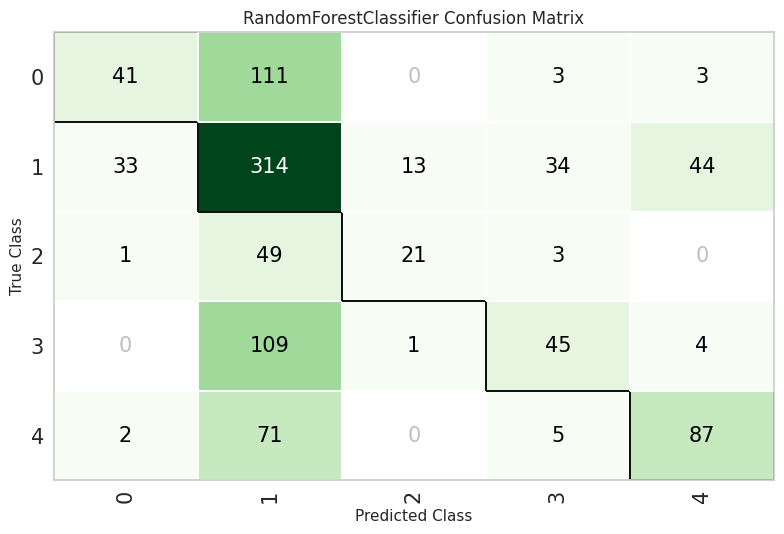

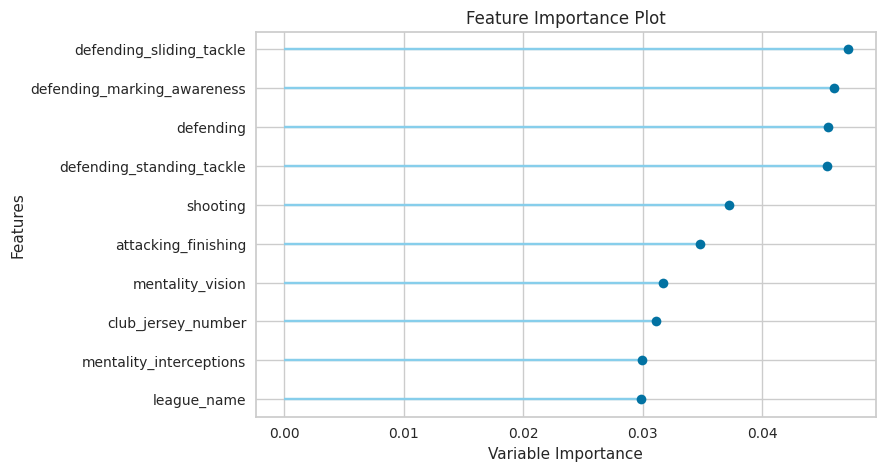

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['overall', 'potential',
                                              'value_eur', 'wage_eur', 'age',
                                              'height_cm', 'weight_kg',
                                              'club_jersey_number',
                                              'club_contract_valid_until',
                                              'weak_foot', 'skill_moves',
                                              'international_reputation',
                                              'release_clause_eur', 'pace',
                                              'shooting', 'passing', 'dribbling',
                                              'defe...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entro

In [50]:
import pandas as pd
from pycaret.classification import *

# CSVファイルの読み込み
data = pd.read_csv('test_label_idx.csv')  # データ型の指定はせず、自動推測に任せる

# PyCaretのセットアップ
classification_setup = setup(
    data=data,
    target='club_position',              # 目的変数の指定（多クラス分類）
    session_id=42,                       # 再現性のための乱数シード
    normalize=True,                      # データの正規化（オプション）
    verbose=False,                       # 詳細な出力を表示しないようにする
    fold_strategy='stratifiedkfold',     # クラスの不均衡を考慮したk分割交差検証
    fold=5,                              # 交差検証の分割数
    fold_shuffle=True,                   # シャッフルして分割
    categorical_features=['league_name', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'is_loaned', 'is_male', 'is_national_team']  # カテゴリカル変数を明示的に指定
)

# モデルの比較 (AUCを基準に選択)
best_model = compare_models(sort='AUC')

# モデルのチューニング(AUCを基準に選択)
tuned_model = tune_model(best_model, optimize='AUC')

# 最良モデルの結果を可視化
plot_model(tuned_model, plot='confusion_matrix')  # 混同行列
plot_model(tuned_model, plot='feature')           # 特徴量の重要度

# チューニング後の最良モデルを保存
save_model(tuned_model, 'best_model_multiclass')

### ZIP Action

In [55]:
import zipfile

with zipfile.ZipFile('multiclass_model_package.zip', 'w') as zf:
    zf.write('best_model_multiclass.pkl')
    zf.write('requirements.txt')
    zf.write('pred.py')

### cetificate to load

In [54]:
!python pred.py

Transformation Pipeline and Model Successfully Loaded
